Importing modules

In [1]:
#suppressing a warning - UserWarning: Wswiglal-redir-stdio
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal
import lal as _lal

In [2]:
import sys

sys.path.insert(0, "../")
from regular_precession import *
from systems_lib import *
from mismatch_n_SNR import *
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams["figure.dpi"] = 200

Defining systems

In [3]:
# Define the default parameters for the system 1
default_precession_params_sys1 = redshifted_new_params(0.3, default_precession_params_sys1)
default_precession_params_sys1_NP = redshifted_new_params(0.3, default_precession_params_sys1_NP)

# Define the default parameters for the system 2
default_precession_params_sys2 = redshifted_new_params(0.3, default_precession_params_sys2)
default_precession_params_sys2_NP = redshifted_new_params(0.3, default_precession_params_sys2_NP)

# Define the default parameters for the system 3
default_precession_params_sys3 = redshifted_new_params(0.3, default_precession_params_sys3)
default_precession_params_sys3_NP = redshifted_new_params(0.3, default_precession_params_sys3_NP)


System 1

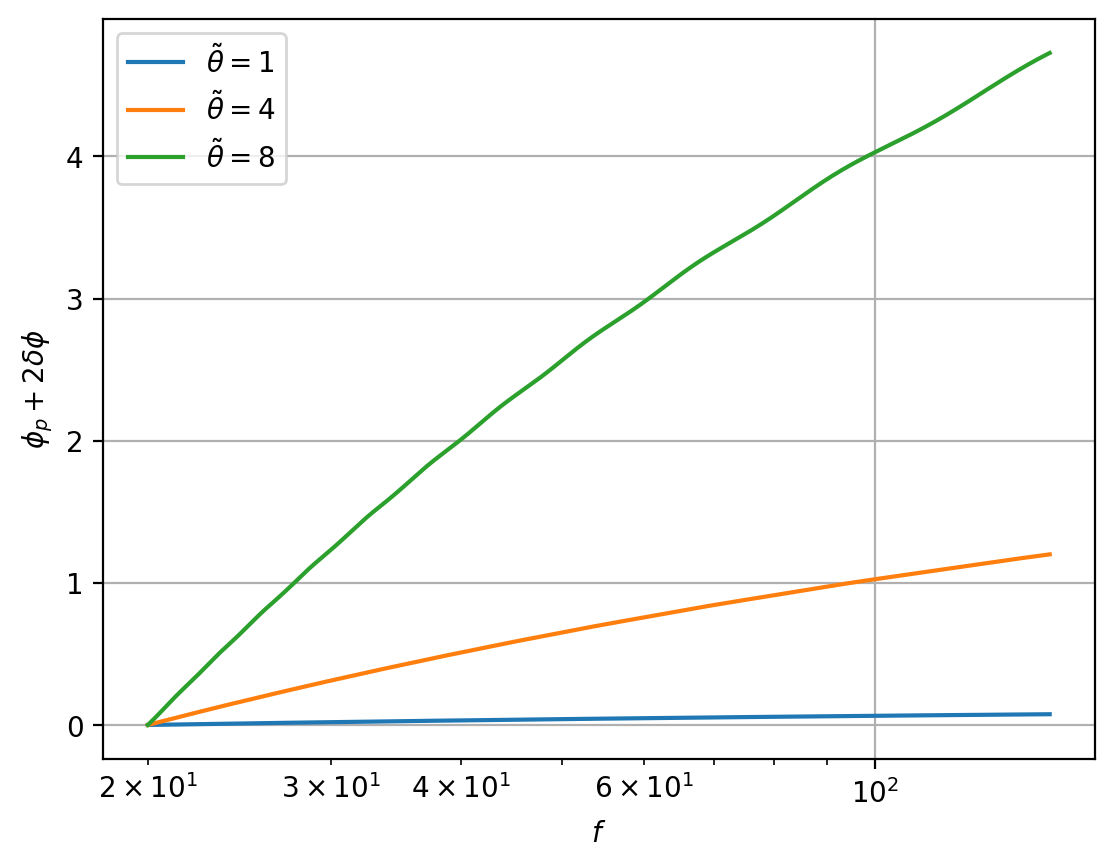

In [4]:
theta_array = np.array([1, 4, 8])
default_precession_params_sys1['omega_tilde'] = 2

phase_t_1_array = []

for t_i in theta_array:
    default_precession_params_sys1['theta_tilde'] = t_i

    f_cut = Regular_precession(default_precession_params_sys1).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys1)
    precession_initial_NP = Regular_precession(default_precession_params_sys1_NP)

    phi_p_RP_t_1 = precession_initial_RP.phase_phi_P(f_range)
    delta_phi_RP_t_1 = precession_initial_RP.phase_delta_phi(f_range)
    #Amp_NP = precession_initial_NP.amplitude(f_range)
    #c_a, s_pa, c_pa = precession_initial_NP.polarization_amplitude_and_phase(f_range)
    
    #frac = (Amp_RP/Amp_NP) - 1
    
    phase_RP_t_1 = phi_p_RP_t_1+2*delta_phi_RP_t_1
    
    phase_t_1_array.append(phase_RP_t_1)

    plt.plot(f_range, phase_RP_t_1, label = r'$\tilde\theta =  {}$'.format(t_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$\phi_p + 2\delta\phi$')
    plt.grid()
    plt.xscale('log')
    #plt.ylim([-0.6, 0.6])


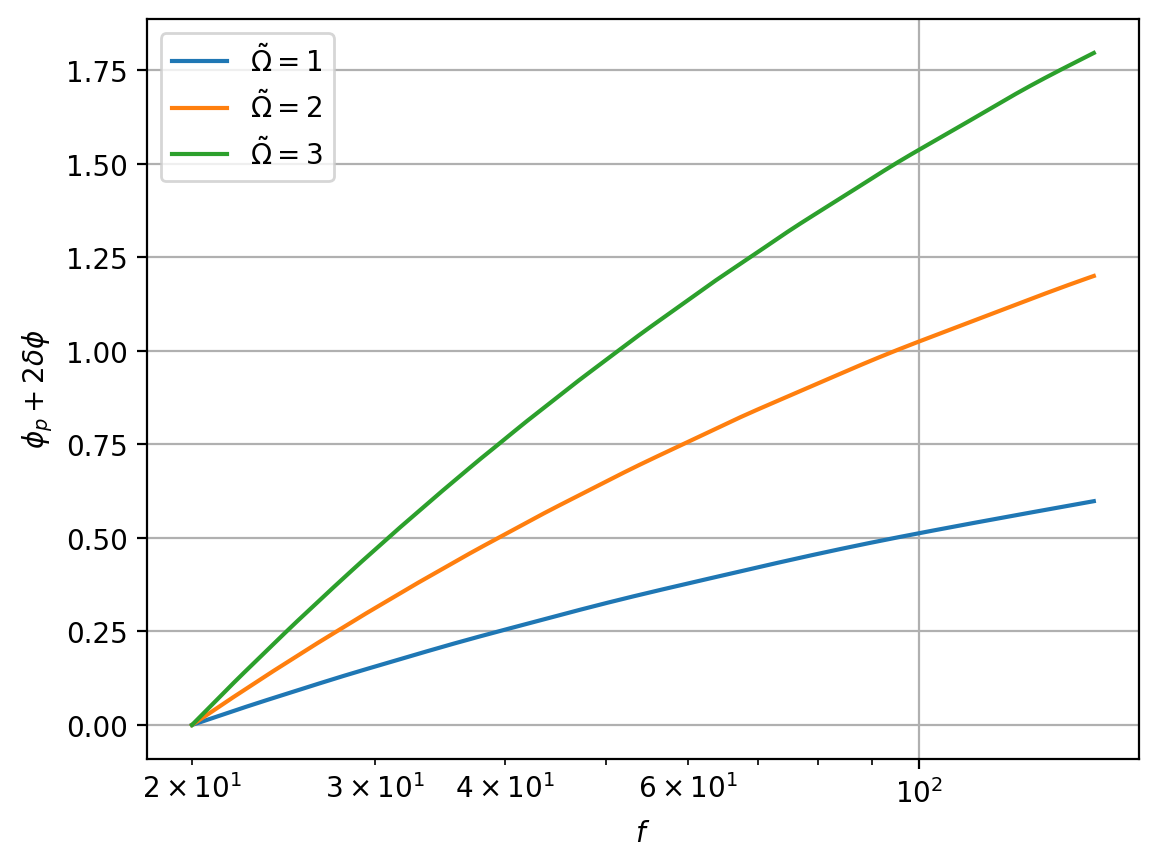

In [5]:
omega_array = np.array([1, 2, 3])
default_precession_params_sys1['theta_tilde'] = 4

phase_o_1_array = []

for o_i in omega_array:
    default_precession_params_sys1['omega_tilde'] = o_i

    f_cut = Regular_precession(default_precession_params_sys1).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys1)
    precession_initial_NP = Regular_precession(default_precession_params_sys1_NP)

    phi_p_RP_o_1 = precession_initial_RP.phase_phi_P(f_range)
    delta_phi_RP_o_1 = precession_initial_RP.phase_delta_phi(f_range)
    #Amp_NP = precession_initial_NP.amplitude(f_range)
    #c_a, s_pa, c_pa = precession_initial_NP.polarization_amplitude_and_phase(f_range)
    
    #frac = (Amp_RP/Amp_NP) - 1
    
    phase_RP_o_1 = phi_p_RP_o_1+2*delta_phi_RP_o_1
    
    phase_o_1_array.append(phase_RP_o_1)

    plt.plot(f_range, phase_RP_o_1, label = r'$\tilde\Omega =  {}$'.format(o_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$\phi_p + 2\delta\phi$')
    plt.grid()
    plt.xscale('log')
    #plt.ylim([-0.6, 0.6])


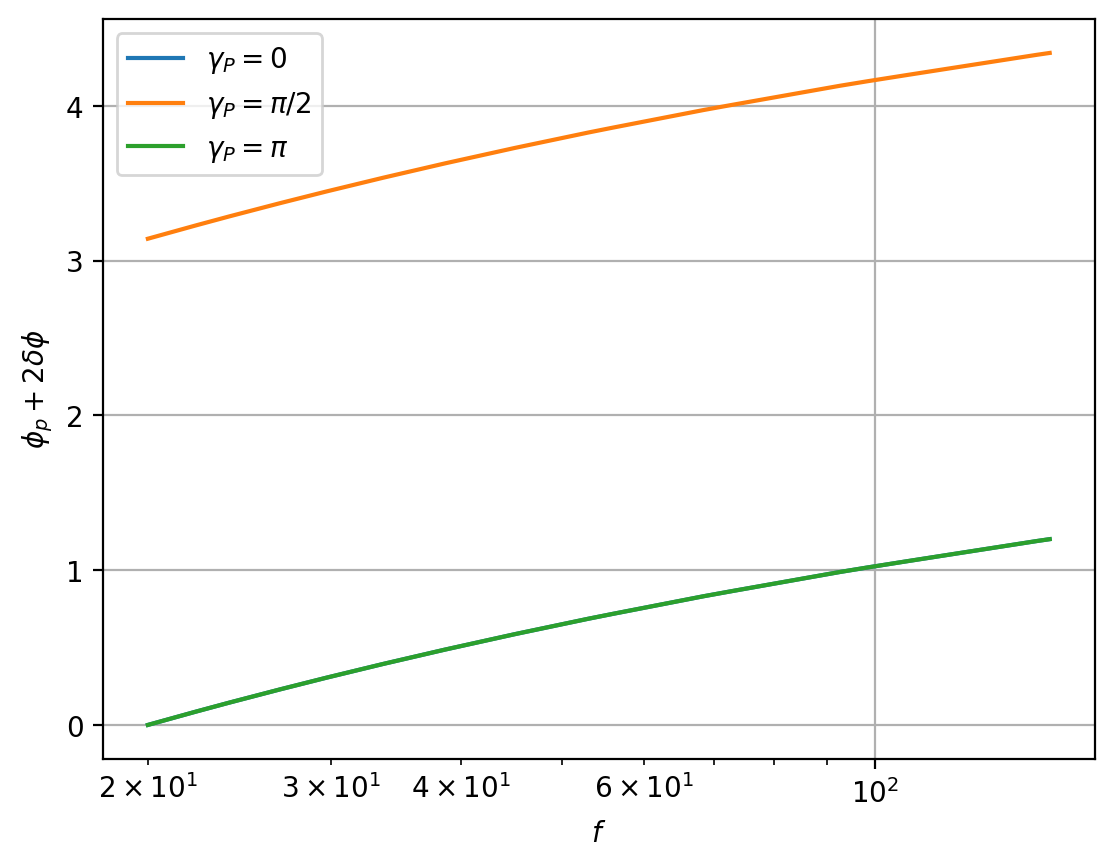

In [6]:
gamma_array = np.array([0, np.pi/2, np.pi])
labels = np.array([r'$\gamma_P = 0$', r'$\gamma_P = \pi/2$', r'$\gamma_P = \pi$'])
default_precession_params_sys1['theta_tilde'] = 4
default_precession_params_sys1['omega_tilde'] = 2

phase_g_1_array = []

it_1 = 0
for g_i in gamma_array:
    default_precession_params_sys1['gamma_P'] = g_i
    
    f_cut = Regular_precession(default_precession_params_sys1).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    precession_initial_RP = Regular_precession(default_precession_params_sys1)

    phi_p_RP_g_1 = precession_initial_RP.phase_phi_P(f_range)
    delta_phi_RP_g_1 = precession_initial_RP.phase_delta_phi(f_range)
    
    #Amp_NP = precession_initial_NP.amplitude(f_range)
    #c_a, s_pa, c_pa = precession_initial_NP.polarization_amplitude_and_phase(f_range)
    
    #frac = (Amp_RP/Amp_NP) - 1
    
    phase_RP_g_1 = phi_p_RP_g_1 + 2*delta_phi_RP_g_1
    
    phase_g_1_array.append(phase_RP_g_1)

    plt.plot(f_range, phase_RP_g_1, label = labels[it_1])
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$\phi_p + 2\delta\phi$')
    plt.grid()
    plt.xscale('log')
    #plt.ylim([-0.6, 0.6])
    it_1 += 1

System 2

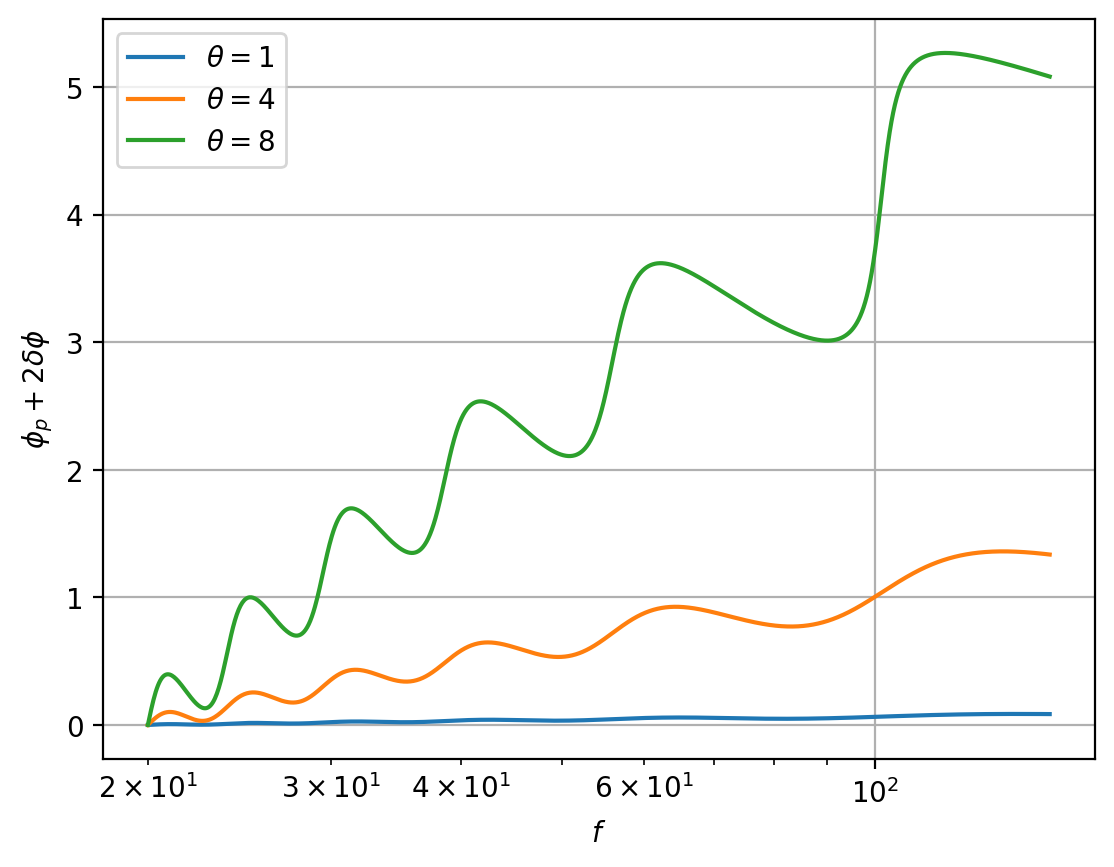

In [7]:
theta_array = np.array([1, 4, 8])
default_precession_params_sys2['omega_tilde'] = 2

phase_t_2_array = []

for t_i in theta_array:
    default_precession_params_sys2['theta_tilde'] = t_i

    f_cut = Regular_precession(default_precession_params_sys2).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys2)
    precession_initial_NP = Regular_precession(default_precession_params_sys2_NP)

    phi_p_RP_t_2 = precession_initial_RP.phase_phi_P(f_range)
    delta_phi_RP_t_2 = precession_initial_RP.phase_delta_phi(f_range)
    #Amp_NP = precession_initial_NP.amplitude(f_range)
    #c_a, s_pa, c_pa = precession_initial_NP.polarization_amplitude_and_phase(f_range)
    
    #frac = (Amp_RP/Amp_NP) - 1
    
    phase_RP_t_2 = phi_p_RP_t_2 + 2*delta_phi_RP_t_2
    
    phase_t_2_array.append(phase_RP_t_2)

    plt.plot(f_range, phase_RP_t_2, label = r'$\theta =  {}$'.format(t_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.xscale('log')
    plt.ylabel(r'$\phi_p + 2\delta\phi$')
    plt.grid()


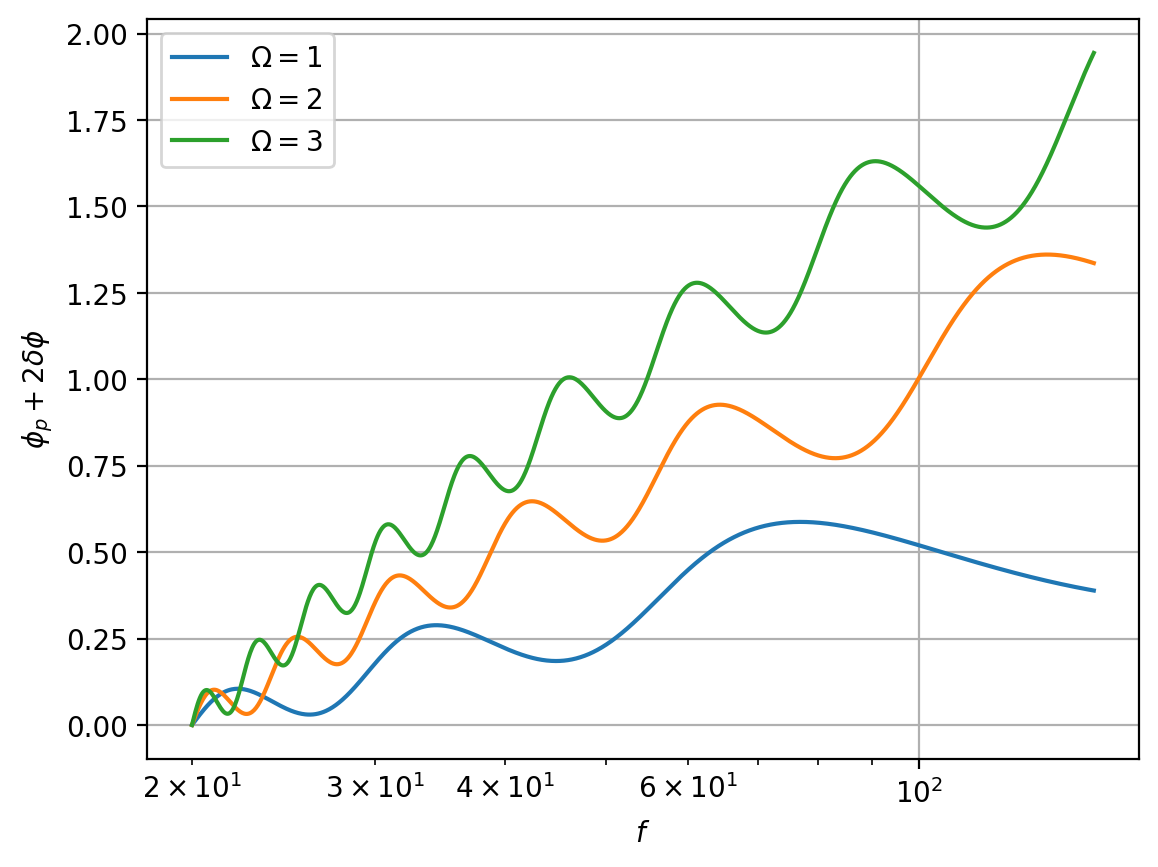

In [8]:
omega_array = np.array([1, 2, 3])
default_precession_params_sys2['theta_tilde'] = 4

phase_o_2_array = []

for o_i in omega_array:
    default_precession_params_sys2['omega_tilde'] = o_i

    f_cut = Regular_precession(default_precession_params_sys2).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys2)
    precession_initial_NP = Regular_precession(default_precession_params_sys2_NP)

    phi_p_RP_o_2 = precession_initial_RP.phase_phi_P(f_range)
    delta_phi_RP_o_2 = precession_initial_RP.phase_delta_phi(f_range)
    
    #Amp_NP = precession_initial_NP.amplitude(f_range)
    #c_a, s_pa, c_pa = precession_initial_NP.polarization_amplitude_and_phase(f_range)
    
    #frac = (Amp_RP/Amp_NP) - 1
    
    phase_RP_o_2 = phi_p_RP_o_2 + 2*delta_phi_RP_o_2
    
    phase_o_2_array.append(phase_RP_o_2)

    plt.plot(f_range, phase_RP_o_2, label = r'$\Omega =  {}$'.format(o_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$\phi_p + 2\delta\phi$')
    plt.grid()
    plt.xscale('log')


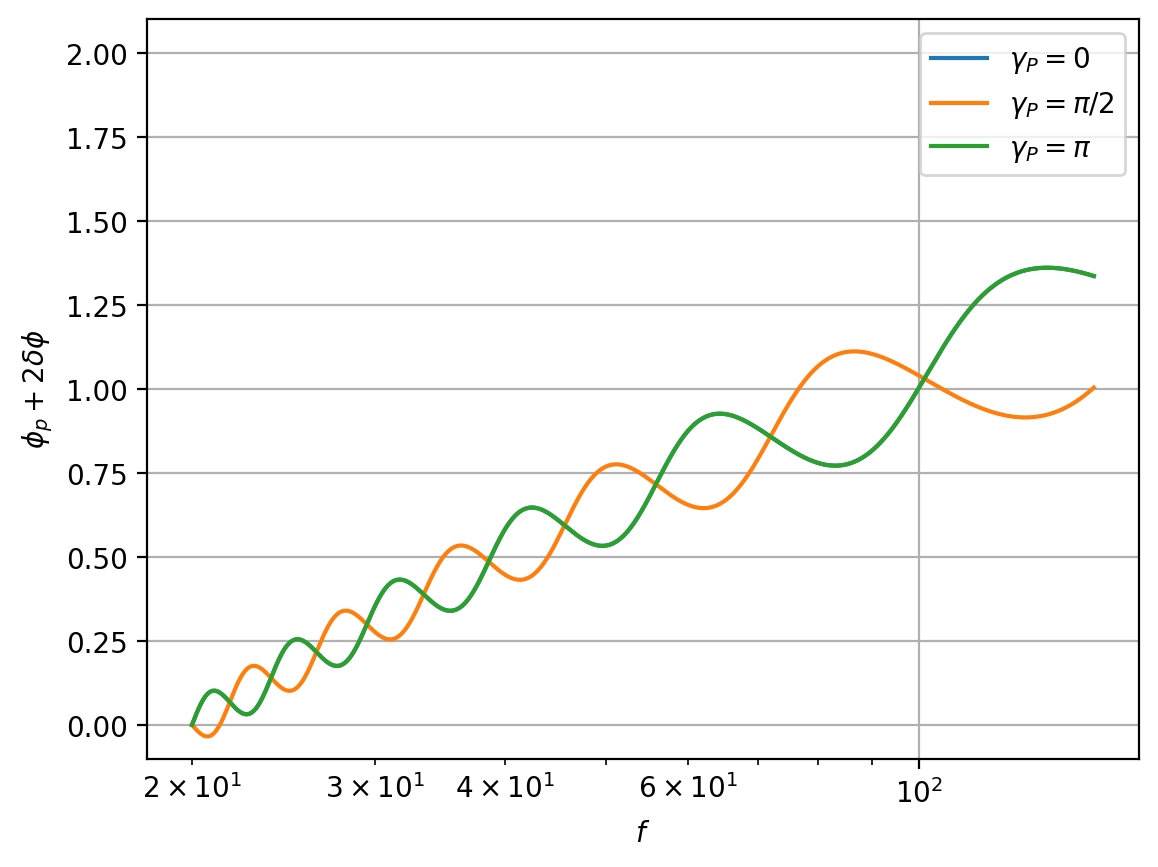

In [9]:
gamma_array = np.array([0, np.pi/2, np.pi])
labels = np.array([r'$\gamma_P = 0$', r'$\gamma_P = \pi/2$', r'$\gamma_P = \pi$'])
default_precession_params_sys2['theta_tilde'] = 4
default_precession_params_sys2['omega_tilde'] = 2

phase_g_2_array = []

it_1 = 0
for g_i in gamma_array:
    default_precession_params_sys2['gamma_P'] = g_i
    
    f_cut = Regular_precession(default_precession_params_sys2).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys2)
    precession_initial_NP = Regular_precession(default_precession_params_sys2_NP)

    phi_p_RP_g_2 = precession_initial_RP.phase_phi_P(f_range)
    delta_phi_RP_g_2 = precession_initial_RP.phase_delta_phi(f_range)
    #Amp_NP = precession_initial_NP.amplitude(f_range)
    #c_a, s_pa, c_pa = precession_initial_NP.polarization_amplitude_and_phase(f_range)
    
    #frac = (Amp_RP/Amp_NP) - 1
    
    phase_RP_g_2 = phi_p_RP_g_2 + 2*delta_phi_RP_g_2
    
    phase_g_2_array.append(phase_RP_g_2)

    plt.plot(f_range, phase_RP_g_2, label = labels[it_1])
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$\phi_p + 2\delta\phi$')
    plt.grid()
    plt.xscale('log')
    plt.ylim([-0.1, 2.1])
    it_1 += 1

System 3

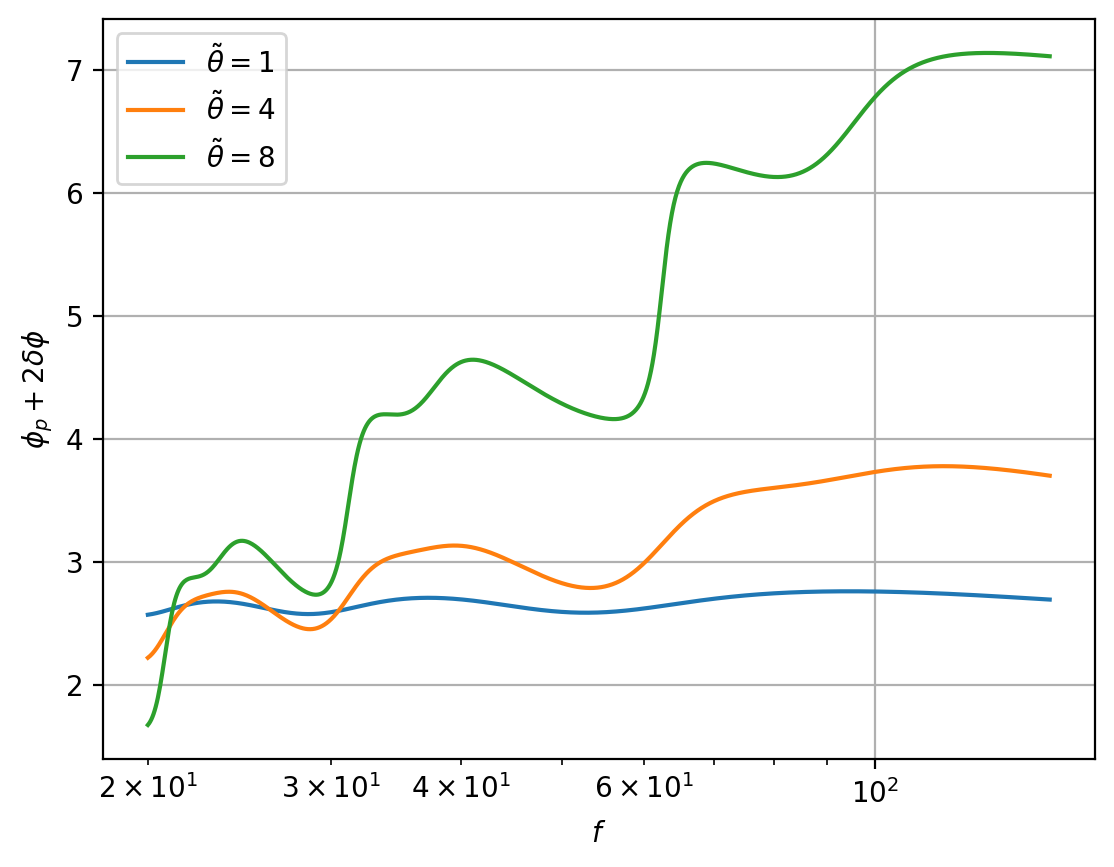

In [10]:
theta_array = np.array([1, 4, 8])
default_precession_params_sys3['omega_tilde'] = 2
default_precession_params_sys3['gamma_P'] =0

phase_t_3_array = []

for t_i in theta_array:
    default_precession_params_sys3['theta_tilde'] = t_i

    f_cut = Regular_precession(default_precession_params_sys3).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys3)
    precession_initial_NP = Regular_precession(default_precession_params_sys3_NP)

    phi_p_RP_t_3 = precession_initial_RP.phase_phi_P(f_range)
    delta_phi_RP_t_3 = precession_initial_RP.phase_delta_phi(f_range)
    
    
    phase_RP_t_3 = phi_p_RP_t_3 + 2*delta_phi_RP_t_3
    
    phase_t_3_array.append(phase_RP_t_3)

    plt.plot(f_range, phase_RP_t_3, label = r'$\tilde\theta =  {}$'.format(t_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.xscale('log')
    plt.ylabel(r'$\phi_p + 2\delta\phi$')
    plt.grid()


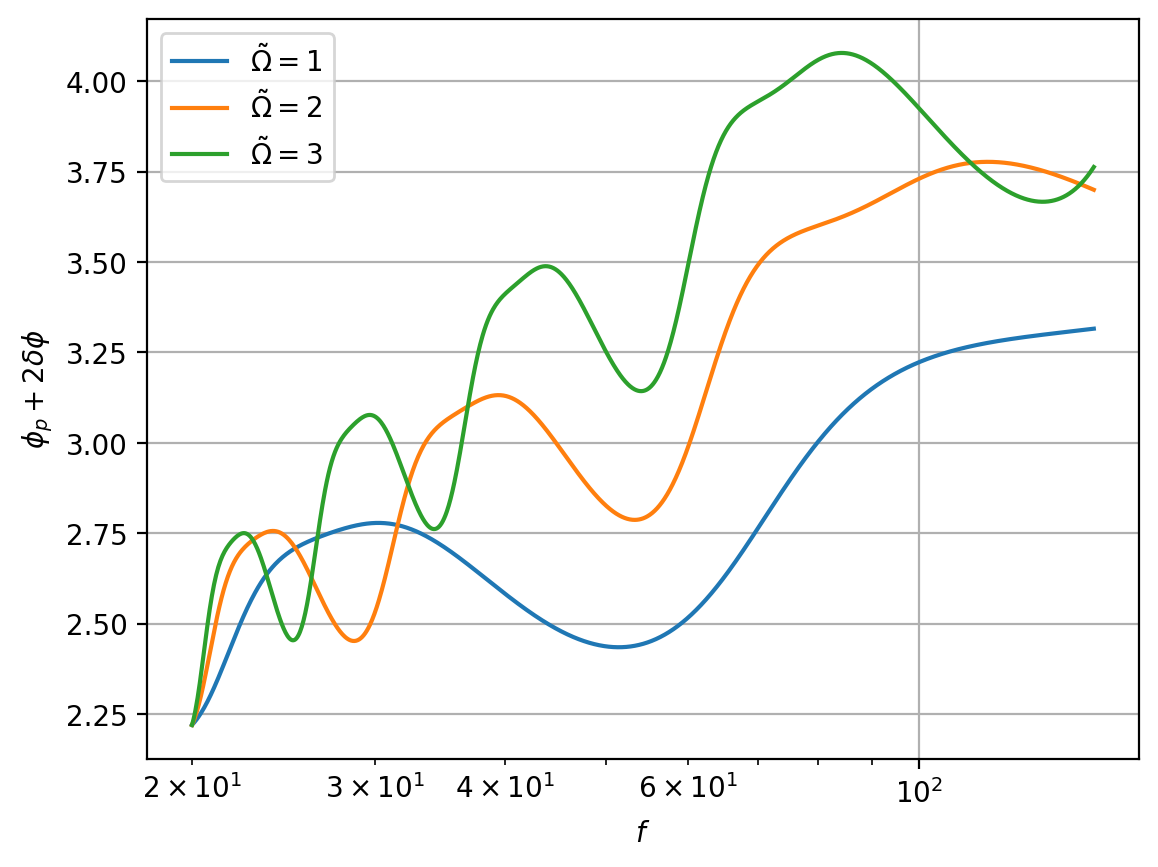

In [11]:
omega_array = np.array([1, 2, 3])
default_precession_params_sys3['theta_tilde'] = 4

phase_o_3_array = []

for o_i in omega_array:
    default_precession_params_sys3['omega_tilde'] = o_i

    f_cut = Regular_precession(default_precession_params_sys3).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys3)
    precession_initial_NP = Regular_precession(default_precession_params_sys3_NP)

    phi_p_RP_o_3 = precession_initial_RP.phase_phi_P(f_range)
    delta_phi_RP_o_3 = precession_initial_RP.phase_delta_phi(f_range)
    
    phase_RP_o_3 = phi_p_RP_o_3 + 2*delta_phi_RP_o_3
    
    phase_o_3_array.append(phase_RP_o_3)

    plt.plot(f_range, phase_RP_o_3, label = r'$\tilde\Omega =  {}$'.format(o_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$\phi_p + 2\delta\phi$')
    plt.grid()
    plt.xscale('log')



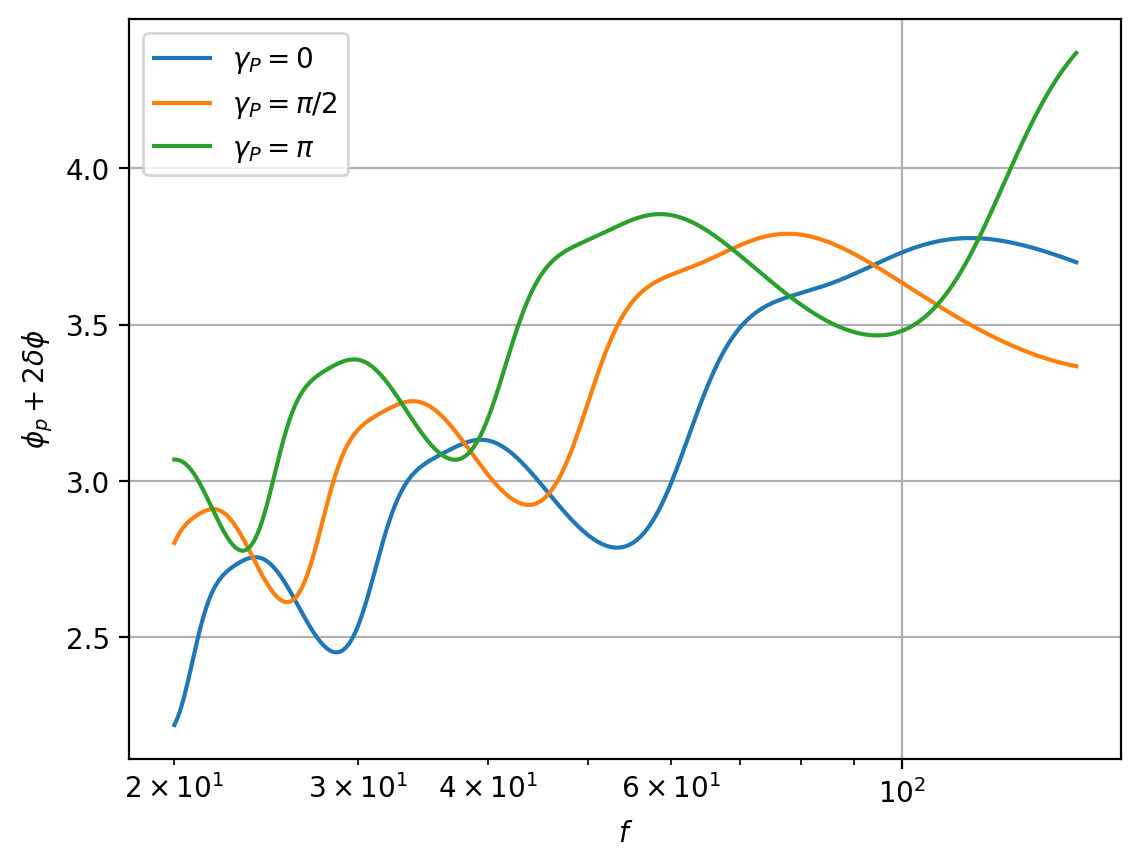

In [12]:
gamma_array = np.array([0, np.pi/2, np.pi])
labels = np.array([r'$\gamma_P = 0$', r'$\gamma_P = \pi/2$', r'$\gamma_P = \pi$'])
default_precession_params_sys3['theta_tilde'] = 4
default_precession_params_sys3['omega_tilde'] = 2

phase_g_3_array = []

it_1 = 0
for g_i in gamma_array:
    default_precession_params_sys3['gamma_P'] = g_i
    
    f_cut = Regular_precession(default_precession_params_sys3).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys3)
    precession_initial_NP = Regular_precession(default_precession_params_sys3_NP)

    phi_p_RP_g_3 = precession_initial_RP.phase_phi_P(f_range)
    delta_phi_RP_g_3 = precession_initial_RP.phase_delta_phi(f_range)

    
    phase_RP_g_3 = phi_p_RP_g_3 + 2*delta_phi_RP_g_3

    
    phase_g_3_array.append(phase_RP_g_3)

    plt.plot(f_range, phase_RP_g_3, label = labels[it_1])
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$\phi_p + 2\delta\phi$')
    plt.grid()
    plt.xscale('log')
    #plt.ylim([-0.6, 0.6])
    it_1 += 1

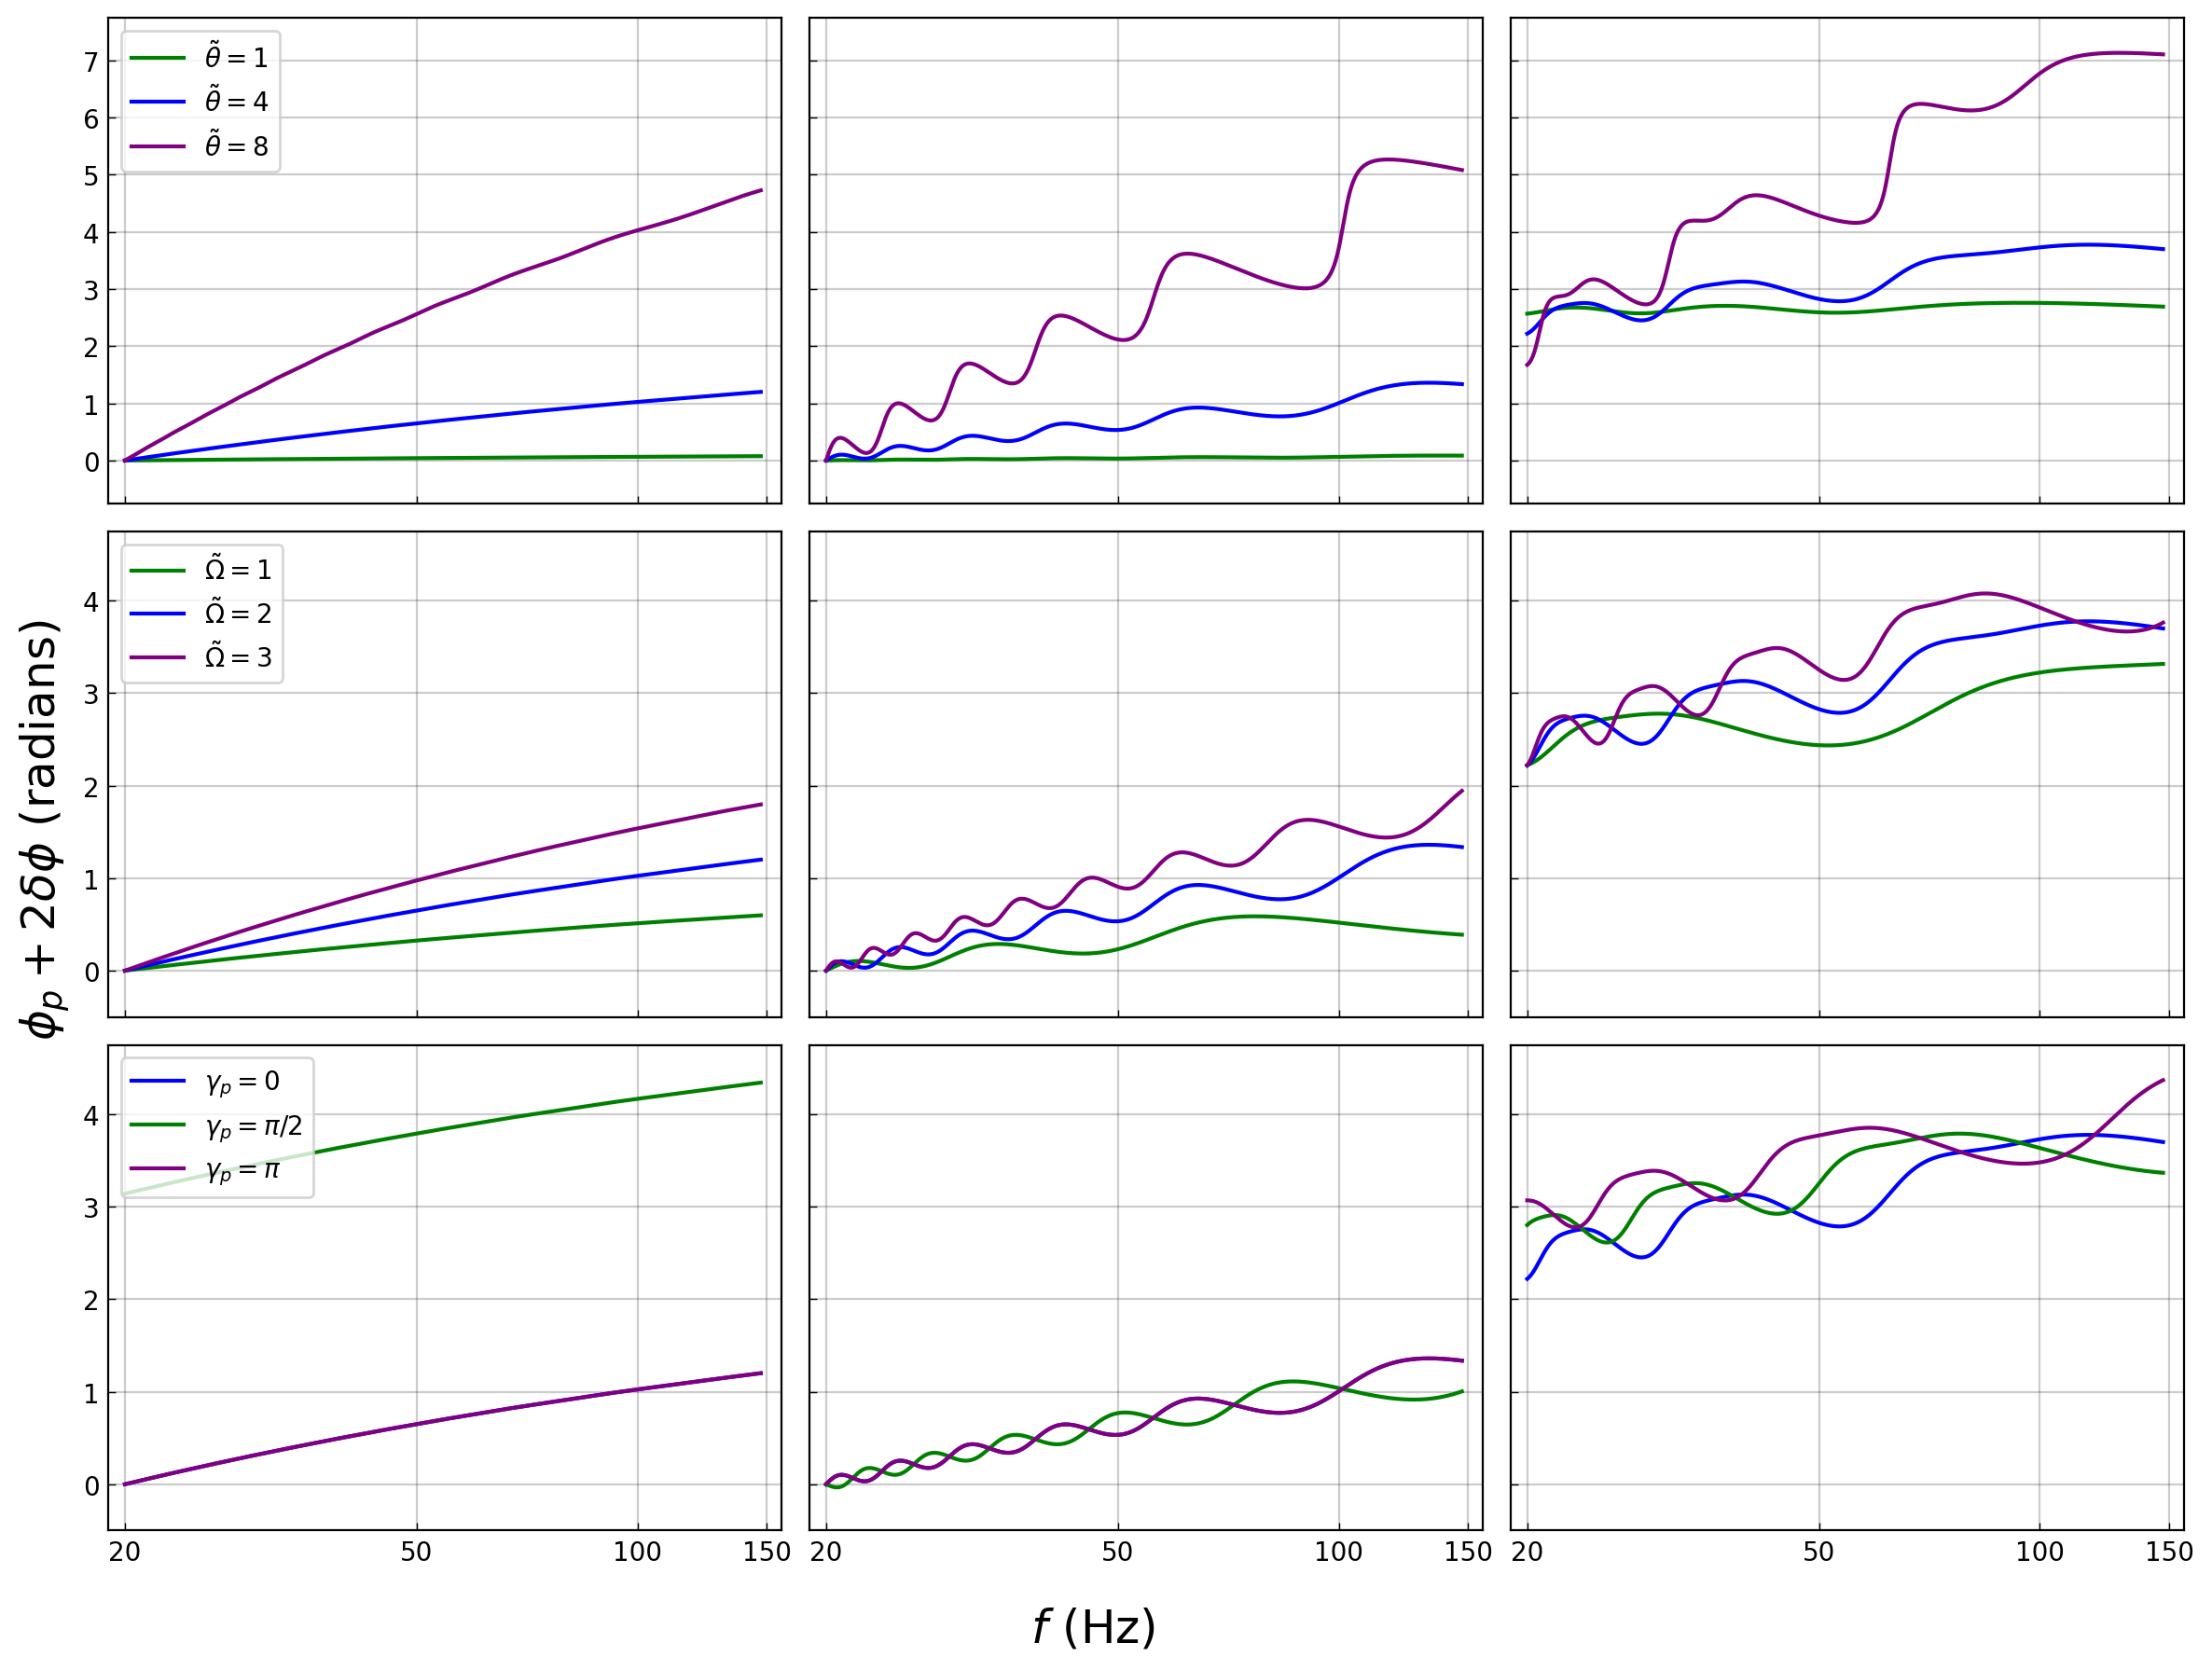

In [15]:
fig_size=[12,9]
fig,ax = plt.subplots(3,3, sharex=True, sharey='row', figsize=fig_size)


# Set y-axis limits for the first row of subplots
plt.setp(ax[0,:],ylim =[-0.75, 7.75])

#system 1 theta_tilde
ax[0,0].plot(f_range, phase_t_1_array[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,0].plot(f_range, phase_t_1_array[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,0].plot(f_range, phase_t_1_array[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')

ax[0,0].legend(shadow=False, fancybox=True,loc = 'upper left',prop={'size': 10})
ax[0,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,0].grid()
ax[0,0].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 2
ax[0,1].plot(f_range, phase_t_2_array[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,1].plot(f_range, phase_t_2_array[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,1].plot(f_range, phase_t_2_array[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')

ax[0,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,1].grid()
ax[0,1].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 3
ax[0,2].plot(f_range, phase_t_3_array[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,2].plot(f_range, phase_t_3_array[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,2].plot(f_range, phase_t_3_array[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')

ax[0,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,2].grid()
ax[0,2].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

plt.setp(ax[1,:],ylim =[-0.5, 4.75])

#system 1 omega_tilde
ax[1,0].plot(f_range, phase_o_1_array[0],color = 'g',label=r'$\tilde{\Omega}=1$')#,\tilde{\Omega}=2$')
ax[1,0].plot(f_range, phase_o_1_array[1],color = 'b',label=r'$\tilde{\Omega}=2$')#,\tilde{\Omega}=2$')
ax[1,0].plot(f_range, phase_o_1_array[2],color = 'purple',label=r'$\tilde{\Omega}=3$')#, \tilde{\Omega}=2$')

ax[1,0].legend(shadow=False, fancybox=True,loc = 'upper left',prop={'size': 10})
ax[1,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,0].grid()
ax[1,0].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 2
ax[1,1].plot(f_range, phase_o_2_array[0],color = 'g',label=r'$\tilde{\Omega}=1$')
ax[1,1].plot(f_range, phase_o_2_array[1],color = 'b',label=r'$\tilde{\Omega}=2$')
ax[1,1].plot(f_range, phase_o_2_array[2],color = 'purple',label=r'$\tilde{\Omega}=3$')

ax[1,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,1].grid()
ax[1,1].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 3
ax[1,2].plot(f_range, phase_o_3_array[0],color = 'g',label=r'$\tilde{\Omega}=1$')#,\tilde{\Omega}=2$')
ax[1,2].plot(f_range, phase_o_3_array[1],color = 'b',label=r'$\tilde{\Omega}=2$')#,\tilde{\Omega}=2$')
ax[1,2].plot(f_range, phase_o_3_array[2],color = 'purple',label=r'$\tilde{\Omega}=3$')#, \tilde{\Omega}=2$')

ax[1,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,2].grid()
ax[1,2].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)


plt.setp(ax[2,:],ylim =[-0.5, 4.75])

#system 1 gamma_p
ax[2,0].plot(f_range, phase_g_1_array[0],color = 'b',label=r'$\gamma_p = 0$')
ax[2,0].plot(f_range, phase_g_1_array[1],color = 'g',label=r'$\gamma_p = \pi/2$')
ax[2,0].plot(f_range, phase_g_1_array[2],color = 'purple',label=r'$\gamma_p = \pi$')

ax[2,0].legend(shadow=False, fancybox=True,loc = 'upper left', prop={'size': 10})
ax[2,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[2,0].grid()
ax[2,0].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 2
ax[2,1].plot(f_range, phase_g_2_array[0],color = 'b',label=r'$\gamma_p = 0$')
ax[2,1].plot(f_range, phase_g_2_array[1],color = 'g',label=r'$\gamma_p = \pi/2$')
ax[2,1].plot(f_range, phase_g_2_array[2],color = 'purple',label=r'$\gamma_p = \pi$')

ax[2,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[2,1].grid()
ax[2,1].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 3
ax[2,2].plot(f_range, phase_g_3_array[0],color = 'b',label=r'$\gamma_p = 0$')
ax[2,2].plot(f_range, phase_g_3_array[1],color = 'g',label=r'$\gamma_p = \pi/2$')
ax[2,2].plot(f_range, phase_g_3_array[2],color = 'purple',label=r'$\gamma_p = \pi$')

ax[2,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[2,2].grid()
ax[2,2].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

plt.setp(ax[0,:], xticks=[20,50,100,150], yticks = [0, 1, 2, 3, 4, 5, 6, 7])
plt.setp(ax[1,:], xticks=[20,50,100,150], yticks = [0, 1, 2, 3, 4])
plt.setp(ax[2,:], xticks=[20,50,100,150], yticks = [0, 1, 2, 3, 4])

fig.supylabel(r'$\phi_p + 2\delta\phi~$(radians)', fontsize =18)
fig.supxlabel(r'$f$ (Hz)', fontsize =18)


plt.xlim(19, f_cut+10)
ax[0,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)

plt.xscale('log')
plt.grid(True)

plt.tight_layout()

xticks=[20, 50, 100, 150]
plt.xticks(xticks, [format(tick, '.0f') for tick in xticks])


fig = plt.gcf()
fig.savefig('figs/phase_phip_n_deltaphi_fig.pdf', format='pdf')




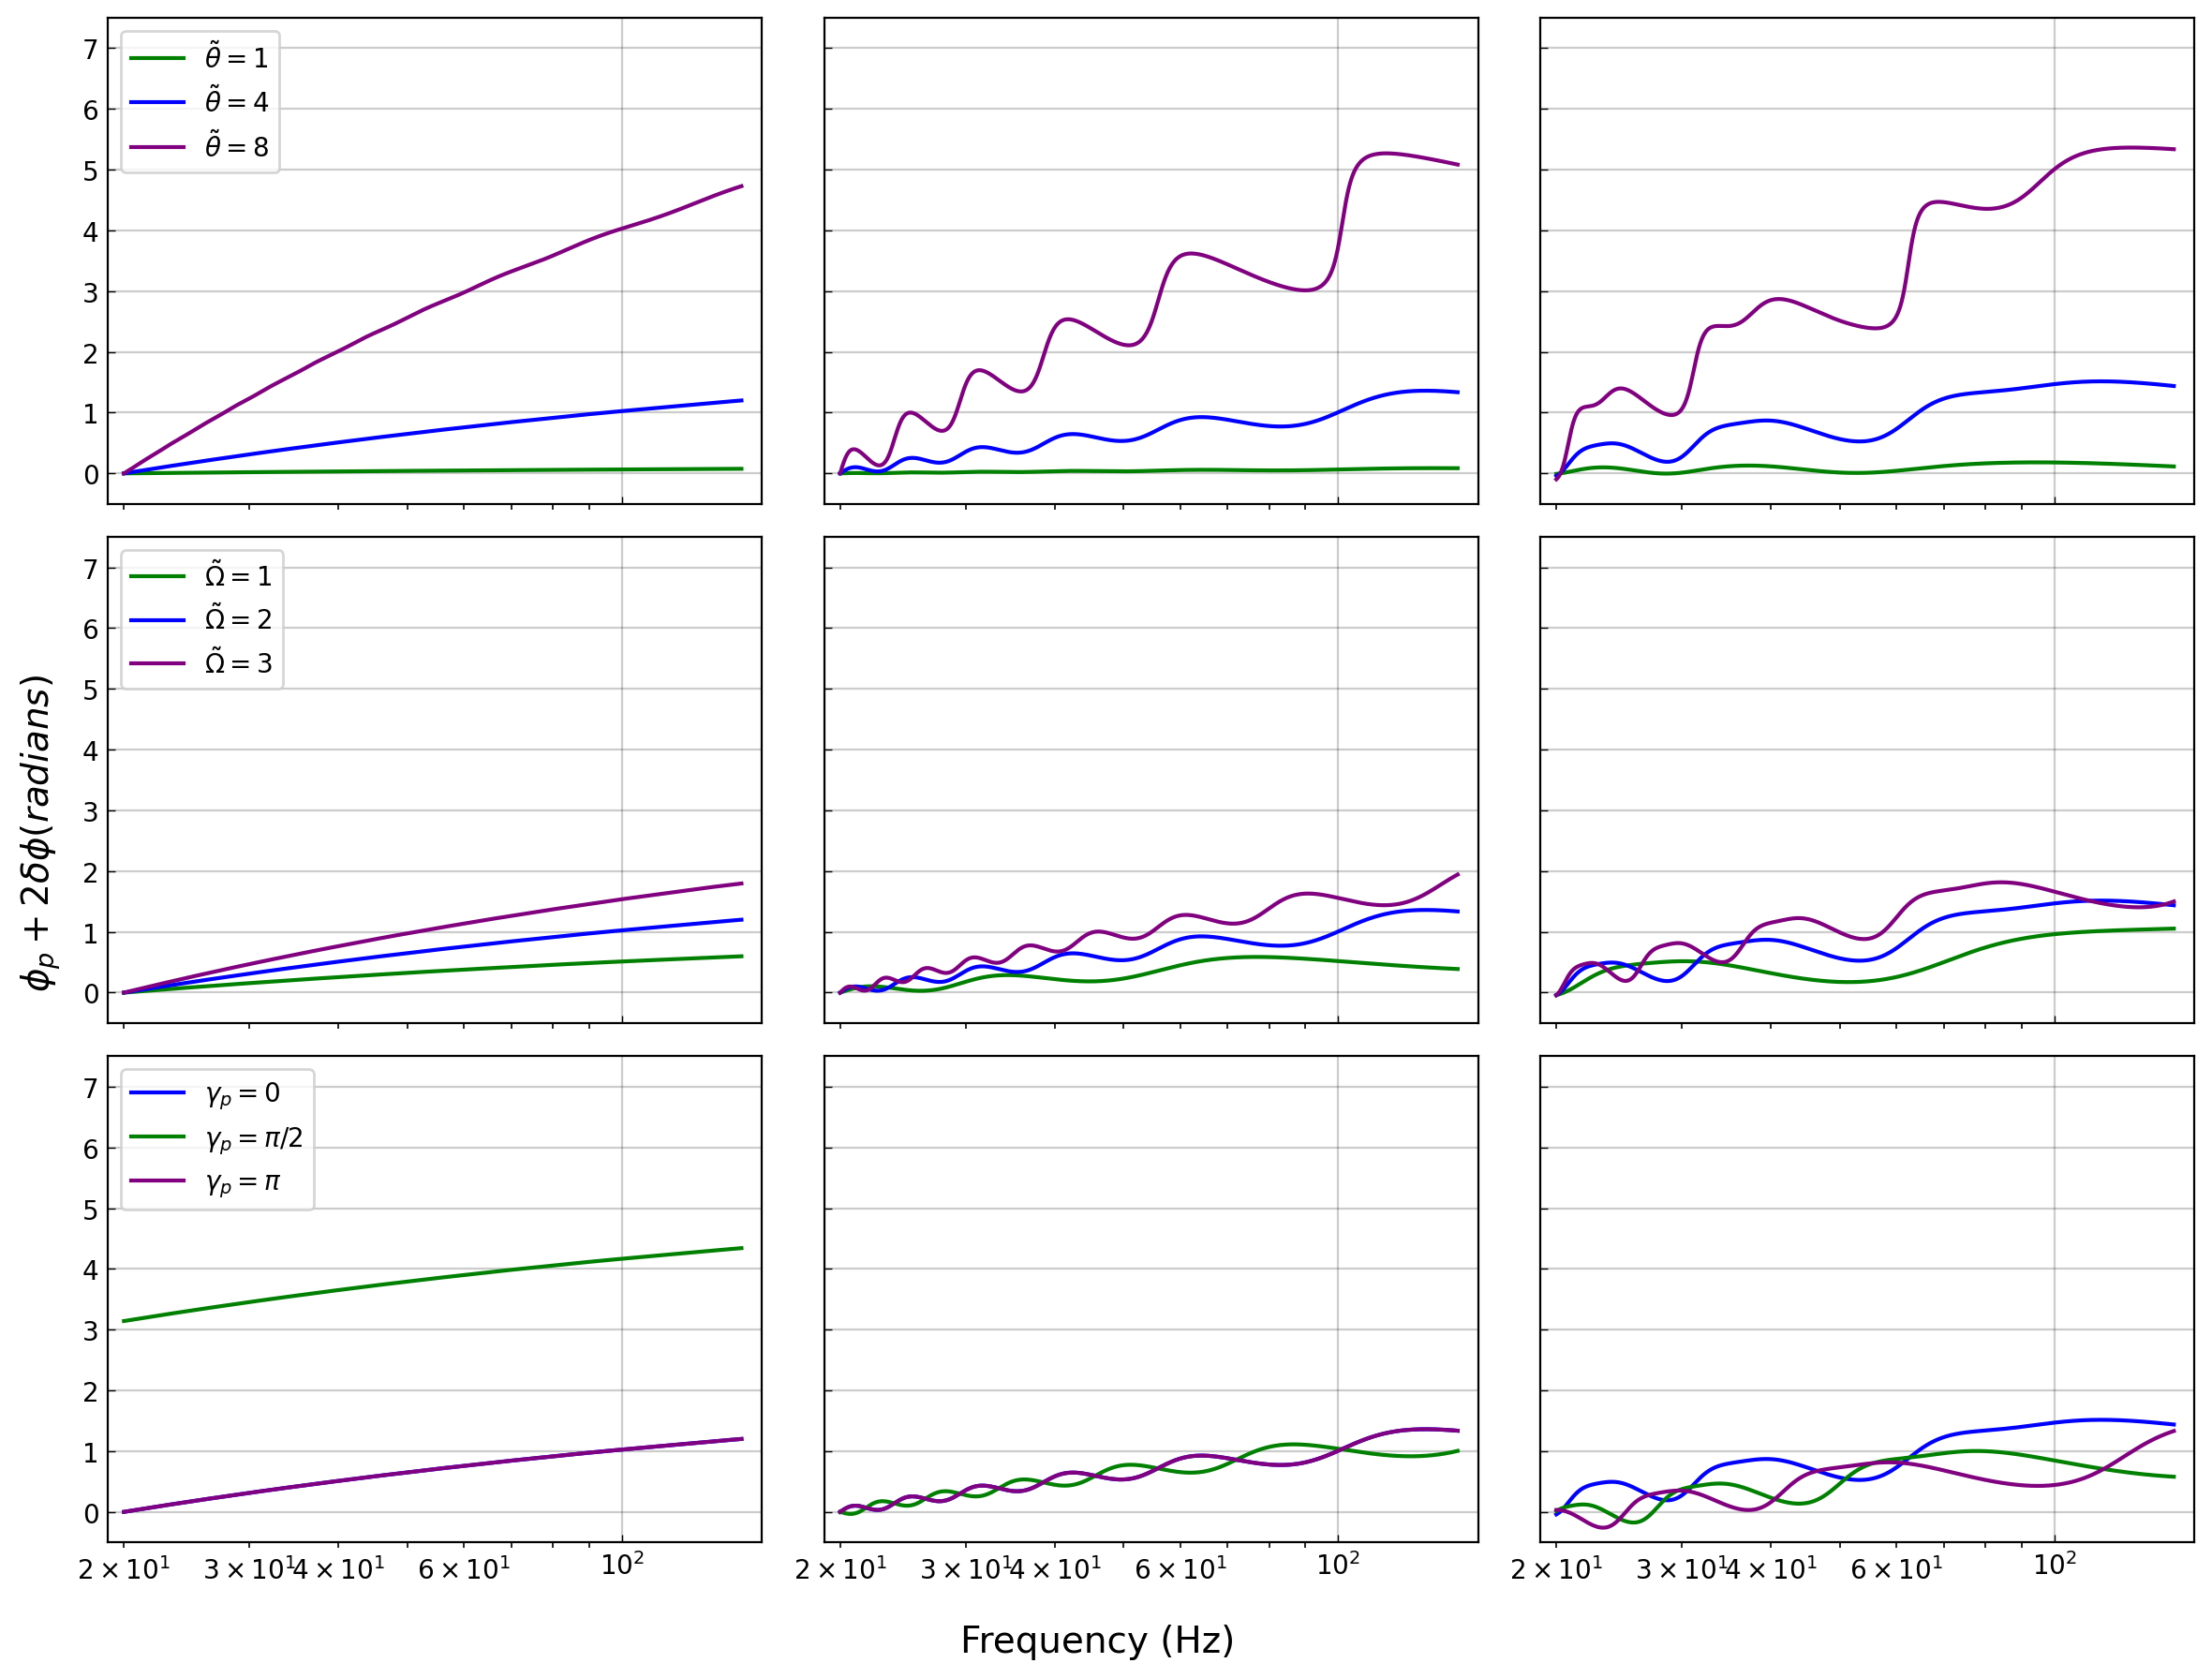

In [14]:
fig_size=[12,9]
fig,ax = plt.subplots(3,3,sharex=True, sharey=True,figsize=fig_size)

# Set y-axis limits for the first column of subplots
ax[0, 0].set_ylim([-0.5, 7.5])



#system 1 theta_tilde
ax[0,0].plot(f_range, phase_t_1_array[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,0].plot(f_range, phase_t_1_array[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,0].plot(f_range, phase_t_1_array[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')

ax[0,0].legend(shadow=False, fancybox=True,loc = 'upper left',prop={'size': 10})
ax[0,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,0].grid()

#system 2
ax[0,1].plot(f_range, phase_t_2_array[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,1].plot(f_range, phase_t_2_array[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,1].plot(f_range, phase_t_2_array[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')

ax[0,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,1].grid()

#system 3
ax[0,2].plot(f_range, phase_t_3_array[0]-2.5788980898228693,color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,2].plot(f_range, phase_t_3_array[1]-2.261599835064918,color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,2].plot(f_range, phase_t_3_array[2]-1.7718199422338357,color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')

ax[0,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,2].grid()


#system 1 omega_tilde
ax[1,0].plot(f_range, phase_o_1_array[0],color = 'g',label=r'$\tilde{\Omega}=1$')#,\tilde{\Omega}=2$')
ax[1,0].plot(f_range, phase_o_1_array[1],color = 'b',label=r'$\tilde{\Omega}=2$')#,\tilde{\Omega}=2$')
ax[1,0].plot(f_range, phase_o_1_array[2],color = 'purple',label=r'$\tilde{\Omega}=3$')#, \tilde{\Omega}=2$')

ax[1,0].legend(shadow=False, fancybox=True,loc = 'upper left',prop={'size': 10})
ax[1,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,0].grid()

#system 2
ax[1,1].plot(f_range, phase_o_2_array[0],color = 'g',label=r'$\tilde{\Omega}=1$')
ax[1,1].plot(f_range, phase_o_2_array[1],color = 'b',label=r'$\tilde{\Omega}=2$')
ax[1,1].plot(f_range, phase_o_2_array[2],color = 'purple',label=r'$\tilde{\Omega}=3$')

ax[1,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,1].grid()

#system 3
ax[1,2].plot(f_range, phase_o_3_array[0]-2.261599835064918,color = 'g',label=r'$\tilde{\Omega}=1$')#,\tilde{\Omega}=2$')
ax[1,2].plot(f_range, phase_o_3_array[1]-2.261599835064918,color = 'b',label=r'$\tilde{\Omega}=2$')#,\tilde{\Omega}=2$')
ax[1,2].plot(f_range, phase_o_3_array[2]-2.261599835064918,color = 'purple',label=r'$\tilde{\Omega}=3$')#, \tilde{\Omega}=2$')

ax[1,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,2].grid()


#system 1 gamma_p
ax[2,0].plot(f_range, phase_g_1_array[0],color = 'b',label=r'$\gamma_p = 0$')
ax[2,0].plot(f_range, phase_g_1_array[1],color = 'g',label=r'$\gamma_p = \pi/2$')
ax[2,0].plot(f_range, phase_g_1_array[2],color = 'purple',label=r'$\gamma_p = \pi$')

ax[2,0].legend(shadow=False, fancybox=True,loc = 'upper left', prop={'size': 10})
ax[2,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[2,0].grid()

#system 2
ax[2,1].plot(f_range, phase_g_2_array[0],color = 'b',label=r'$\gamma_p = 0$')
ax[2,1].plot(f_range, phase_g_2_array[1],color = 'g',label=r'$\gamma_p = \pi/2$')
ax[2,1].plot(f_range, phase_g_2_array[2],color = 'purple',label=r'$\gamma_p = \pi$')

ax[2,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[2,1].grid()

#system 3
ax[2,2].plot(f_range, phase_g_3_array[0]-2.261599835064918,color = 'b',label=r'$\gamma_p = 0$')
ax[2,2].plot(f_range, phase_g_3_array[1]-2.788505120102847,color = 'g',label=r'$\gamma_p = \pi/2$')
ax[2,2].plot(f_range, phase_g_3_array[2]-3.0378072747758895,color = 'purple',label=r'$\gamma_p = \pi$')

ax[2,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[2,2].grid()

plt.setp(ax[0,0], xticks=[20,50,100,150,200], yticks = [0, 1, 2, 3, 4, 5, 6, 7])
plt.setp(ax[0,1], xticks=[20,50,100,150,200], yticks = [0, 1, 2, 3, 4, 5, 6, 7])
plt.setp(ax[0,2], xticks=[20,50,100,150,200], yticks = [0, 1, 2, 3, 4, 5, 6, 7])


fig.supylabel(r'$\phi_p + 2\delta\phi (radians)$', fontsize =14)
fig.supxlabel(r'Frequency (Hz)', fontsize =14)

plt.xlim(19, f_cut+10)
ax[0,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)

plt.xscale('log')
plt.grid(True)

plt.tight_layout()


#fig = plt.gcf()
#fig.savefig('phase_new_fig_cemtered_sys3.pdf', format='pdf')


